# Pymaceuticals Inc.
---

### Analysis

- 249 mice were effected by the regimens.
- One mouse was removed due to being a duplicate.
- Capomulin and Ramicane have the smallest tumors on average and had more # of Observed Mouse Timepoints.
- There were more male mice than female.
- Ketapril and Naftisol are the most harmful.
- Infubinol has outliers
- The tumors reduced on mouse l509 as time went on.
- as the weight of the mouse increases, so does the average tumor volume.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.loc[mouse_study["Mouse ID"] != "g989", :]
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(mouse_study_clean["Mouse ID"].unique())
mouse_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_mice = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_mice = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_mice  = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_Mouse = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

regimen_summary = pd.DataFrame({"Mean":mean_mice,
                            "Median":median_mice,
                            "variance":variance_mice,
                            "Standard Deviation":standard_dev,
                            "SEM":SEM_Mouse})
regimen_summary

,Mean,Median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,""
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_mice = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median", "var", "std", "sem"])
agg_mice

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
mouse_per_reg = mouse_study_clean['Drug Regimen'].value_counts()
mouse_per_reg

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

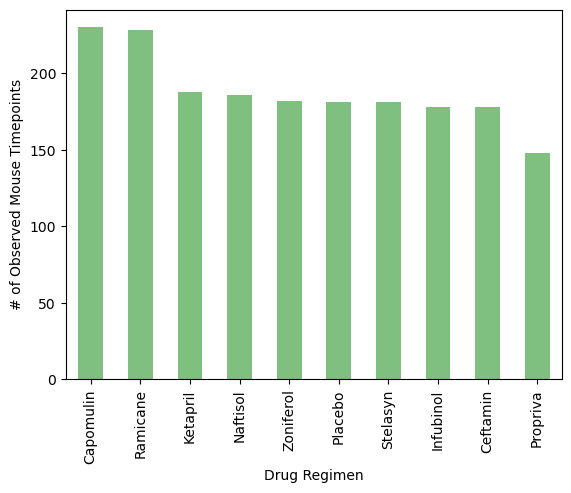

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_per_reg.plot(kind="bar", color="green", alpha=0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

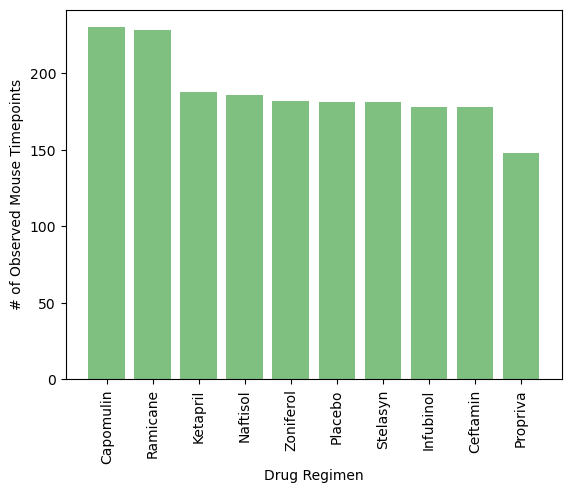

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.mouse_count.plot(kind="bar")
s = pd.Series([230,228,188,186,182,181,181,178,178,148], index=["Capomulin", "Ramicane", "Ketapril", 
                                    "Naftisol", "Zoniferol", "Placebo", "Stelasyn",
                                    "Infubinol", "Ceftamin", "Propriva"])
plt.bar(s.index, s.values, color="g", alpha=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [12]:
gender = mouse_study_clean["Sex"].value_counts()
gender

Sex
Male      958
Female    922
Name: count, dtype: int64

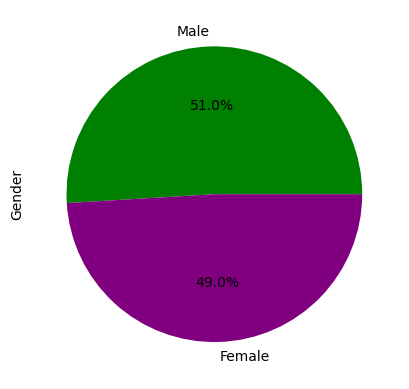

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['green', 'purple']
gender.plot(kind="pie", colors=colors, autopct= "%1.1f%%")
plt.ylabel("Gender")
plt.show()


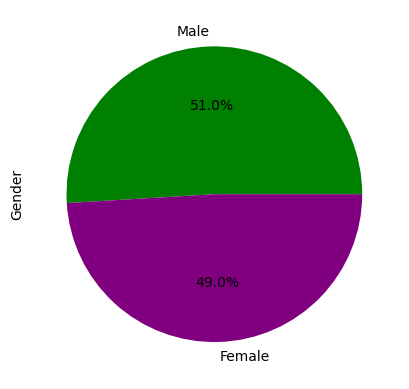

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, autopct= "%1.1f%%", colors=colors, labels = ["Male","Female"])
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_regimen = mouse_study_clean.groupby(['Mouse ID'])['Timepoint'].max()
last_regimen = last_regimen.reset_index()
# last_regimen.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_regimen =  last_regimen.merge(mouse_study_clean, on=("Mouse ID","Timepoint"),how="left")
merge_regimen

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Drug in treatment_list:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol = merge_regimen.loc[merge_regimen['Drug Regimen'] == Drug, 'Tumor Volume (mm3)']
    
    # add subset 
    Tumor_vol.append(final_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    low_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol<low_bound)|(final_vol>upper_bound)]
    print(f"{Drug}'s Potential Outliers {outliers}")

Capomulin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


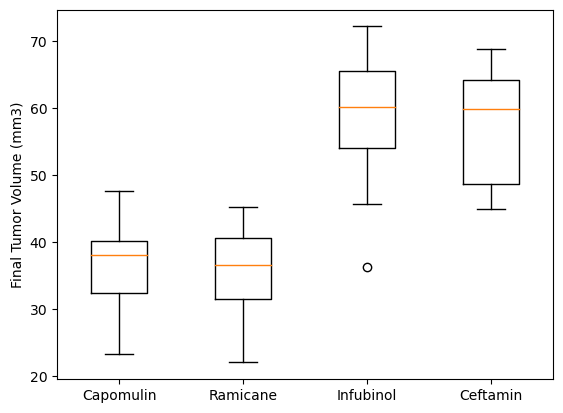

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(Tumor_vol)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [18]:
df_capomulin = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]


In [19]:
l509 = df_capomulin.loc[df_capomulin["Mouse ID"] == "l509"]
l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


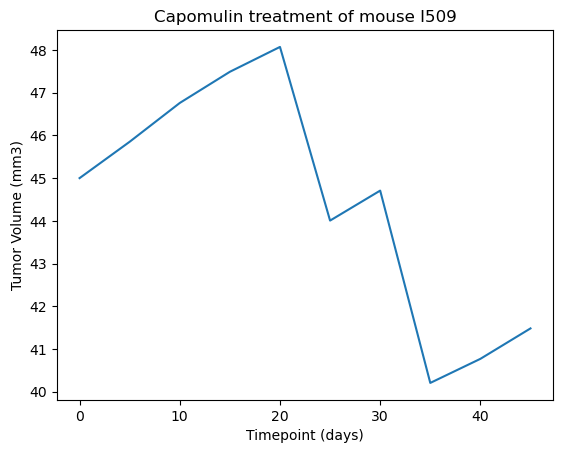

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.plot(l509["Timepoint"], l509["Tumor Volume (mm3)"])

plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



In [21]:
Cap_avg = df_capomulin.groupby(['Mouse ID']).mean('Tumor Volume (mm3)', 'Weight (g)')
Cap_avg

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0, 0.5, 'Average Tumor Volume (mm3)')

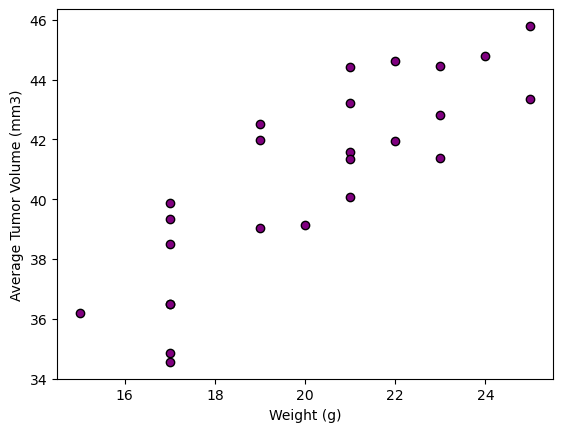

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'], marker="o", facecolors="purple", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [98]:
correlation = st.pearsonr(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'])
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)

In [150]:
res = st.linregress(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'])



The correlation between mouse weight and the average tumor volume is 0.84


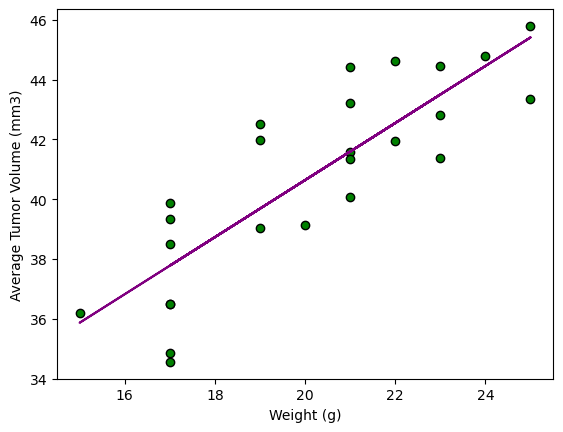

In [152]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'], marker="o", facecolors="green", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(Cap_avg['Weight (g)'],res.intercept + res.slope*Cap_avg['Weight (g)'], color = "purple")
plt.show()
